In [ ]:
!pip install --upgrade tensorflow transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 10.3 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 20.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.45.1
    Uninstalling transformers-4.45.1:
      Successfully uninstalled transformers-4.45.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from transformers import TFBertModel
from tensorflow.keras.utils import to_categorical
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer

In [ ]:
# Definición personalizada
class BertLayer(tf.keras.layers.Layer):
    def __init__(self, model_name='bert-base-uncased', **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert_model = TFBertModel.from_pretrained(model_name)
        self.bert_model.trainable = False  # No ajustar los pesos de BERT

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.bert_model(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.pooler_output

def create_model(max_length=140, output_shape=3):
    # Entradas
    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

    # Usar la capa personalizada de BERT
    pooled_output = BertLayer()([input_ids, attention_mask])

    # Capa de Dropout
    x = tf.keras.layers.Dropout(0.2)(pooled_output)

    # Capa densa de salida
    output = tf.keras.layers.Dense(output_shape, activation='softmax')(x)

    # Crear el modelo
    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

    # Compilación del modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.F1Score(average='macro')])

    return model



In [ ]:
# Uso de la función para crear el modelo
model = create_model(max_length=140, output_shape=3)

# Resumen del modelo
model.summary()

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

I0000 00:00:1729762578.772693      30 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729762578.773122      30 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729762578.784922      30 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729762578.785206      30 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 140)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 140)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer          │ (None, 768)       │          0 │ input_ids[0][0],  │
│ (BertLayer)         │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 768)       │          0 │ bert_layer[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 3)         │      2,307 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,307 (9.01 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)

# Función aucxiliar para el ploteo

In [ ]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

# Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [ ]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0  35890      0  0:00:03  0:00:03 --:--:-- 40922
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0   571k      0  0:00:12  0:00:12 --:--:-- 1933k


In [ ]:
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [ ]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


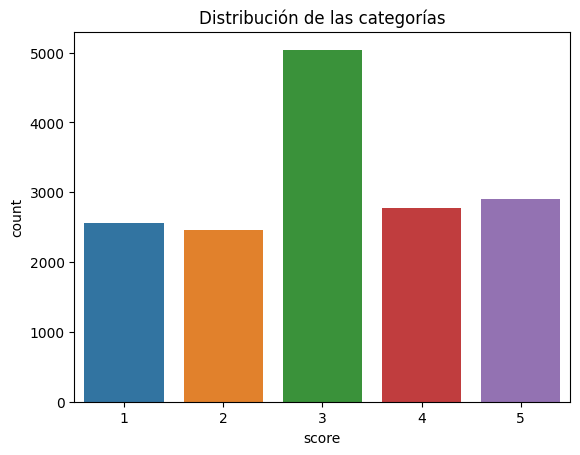

In [ ]:
# ¿Cómo están balanceados los datos?
sns.countplot(x=df.score)
plt.title("Distribución de las categorías")
plt.show()

# Limpieza de datos
Una manera de balancear este dataset es colapsando las dos primeras categorías en una y las dos en otra, para dejar la categoría central sin modificaciones. Lo que implicaría una reducción de categorías de 5 a 3.

In [ ]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

In [ ]:
print(df.sentiment.value_counts())

sentiment
2    5676
1    5042
0    5028
Name: count, dtype: int64


Observemos como luce la distribución luego de la ejecución de la instrucción.

In [ ]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

# Distribución de las longitudes de las reviews

Median: 139.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


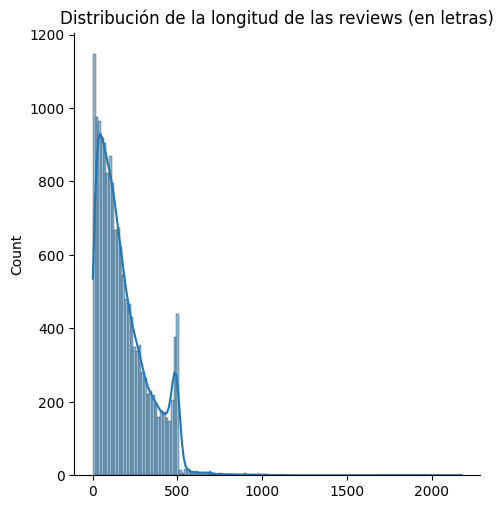

In [ ]:
sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens, kde=True)
plt.title("Distribución de la longitud de las reviews (en letras)")
plt.show()

In [ ]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
output shape: 3


# 1 - Data generator

In [ ]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [ ]:
def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]

    return train_InputExamples, validation_InputExamples


def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32}, tf.float32),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
            },
            tf.TensorShape([output_shape]),
        ),
    )

In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [ ]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [ ]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [ ]:
y_test = y[idx_test]

## 2 - BERT multiclass classification

In [ ]:
history = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5


I0000 00:00:1729765487.614633     116 service.cc:146] XLA service 0x7eab58002d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729765487.614721     116 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729765487.614728     116 service.cc:154]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
W0000 00:00:1729765488.035507     116 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert
I0000 00:00:1729765495.897991     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


    314/Unknown 111s 289ms/step - accuracy: 0.3613 - f1_score: 0.3571 - loss: 1.1543

W0000 00:00:1729765587.030928     116 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


    315/Unknown 118s 312ms/step - accuracy: 0.3614 - f1_score: 0.3572 - loss: 1.1541

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
W0000 00:00:1729765597.787019     117 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert
W0000 00:00:1729765625.184979     116 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


315/315 ━━━━━━━━━━━━━━━━━━━━ 155s 428ms/step - accuracy: 0.3615 - f1_score: 0.3573 - loss: 1.1540 - val_accuracy: 0.5258 - val_f1_score: 0.4551 - val_loss: 1.0066
Epoch 2/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 174s 365ms/step - accuracy: 0.4526 - f1_score: 0.4418 - loss: 1.0531 - val_accuracy: 0.5365 - val_f1_score: 0.4974 - val_loss: 0.9587
Epoch 3/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 114s 363ms/step - accuracy: 0.4926 - f1_score: 0.4818 - loss: 0.9993 - val_accuracy: 0.5468 - val_f1_score: 0.5092 - val_loss: 0.9341
Epoch 4/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 114s 362ms/step - accuracy: 0.5192 - f1_score: 0.5080 - loss: 0.9743 - val_accuracy: 0.5603 - val_f1_score: 0.5538 - val_loss: 0.9156
Epoch 5/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 115s 364ms/step - accuracy: 0.5303 - f1_score: 0.5184 - loss: 0.9631 - val_accuracy: 0.5595 - val_f1_score: 0.4719 - val_loss: 0.9207


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

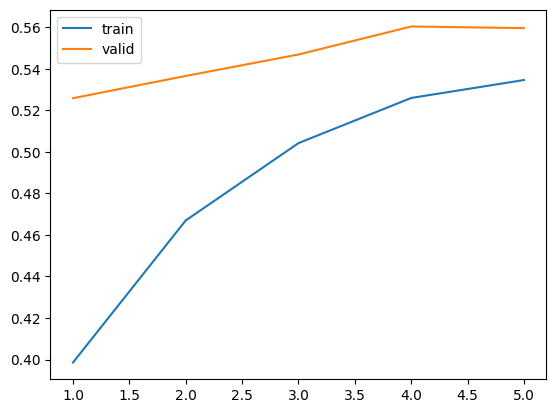

In [ ]:
plot_train_metrics(history)

Por razones de disponibilidad de potencia de computo sólo se realizaron 5 epocas para el entrenamiento. Sin empargo con la personalización de las capas se puede ver que el accuracy es bastante superior a lo obtenido durante lo visto en clase.

In [ ]:
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

W0000 00:00:1729766273.665072     116 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step

W0000 00:00:1729766308.178440     116 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 363ms/step


array([[0.5403728 , 0.2697402 , 0.18988699],
       [0.48040158, 0.20714469, 0.31245375],
       [0.2716495 , 0.2799074 , 0.44844314]], dtype=float32)

In [ ]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [ ]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

W0000 00:00:1729766433.649157     115 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.5656 - f1_score: 0.4831 - loss: 0.9188

W0000 00:00:1729766467.088817     116 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 337ms/step - accuracy: 0.5654 - f1_score: 0.4829 - loss: 0.9188


0.5577777624130249

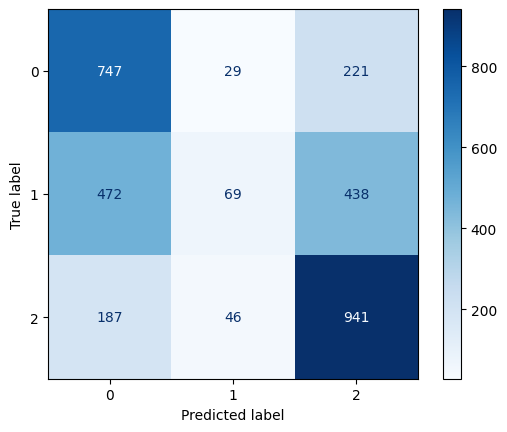

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(3)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Al observar la matriz de confusión se puede observar que el modelo predice mejor al observar las reviews positiva y las negativas, aunque su desempeño no muestra el mismo éxito con la clase neutral.

In [ ]:
model.save_weights('bert_weights_1.weights.h5')

# Ensayo

In [ ]:
text = "I love this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids'])
print("Attention mask:", tf_batch['attention_mask'])

Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [ ]:
y_prob_ensayo = model.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)])

W0000 00:00:1729767389.260574     116 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Clasificación: positive


/tmp/ipykernel_30/3658696224.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Clasificación:", class_names[int(y_prob)])


# Segundo Modelo con fine tuning

In [ ]:
# Uso de la función para crear el modelo
model_2 = create_model(max_length=100, output_shape=3)

# Resumen del modelo
model_2.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_1        │ (None, 768)       │          0 │ input_ids[0][0],  │
│ (BertLayer)         │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 768)       │          0 │ bert_layer_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 3)         │      2,307 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,307 (9.01 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
train_data = train_data.shuffle(100).batch(16)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(16)

In [ ]:
max_length = 100
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [ ]:
X_test = [
    tf_batch['input_ids'],
    tf_batch['attention_mask']
]

y_test = y[idx_test]

In [ ]:
print(f"X_test[0] shape: {X_test[0].shape}")
print(f"y_test shape: {y_test.shape}")

X_test[0] shape: (3150, 100)
y_test shape: (3150, 3)


In [ ]:
history_2 = model_2.fit(
    train_data,
    epochs=5,
    validation_data=validation_data,
)

Epoch 1/5
    630/Unknown 85s 135ms/step - accuracy: 0.5487 - f1_score: 0.5390 - loss: 0.9296

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


630/630 ━━━━━━━━━━━━━━━━━━━━ 106s 169ms/step - accuracy: 0.5487 - f1_score: 0.5390 - loss: 0.9296 - val_accuracy: 0.5710 - val_f1_score: 0.5104 - val_loss: 0.8875
Epoch 2/5
630/630 ━━━━━━━━━━━━━━━━━━━━ 106s 169ms/step - accuracy: 0.5584 - f1_score: 0.5482 - loss: 0.9137 - val_accuracy: 0.5817 - val_f1_score: 0.5781 - val_loss: 0.8708
Epoch 3/5
630/630 ━━━━━━━━━━━━━━━━━━━━ 107s 169ms/step - accuracy: 0.5416 - f1_score: 0.5328 - loss: 0.9319 - val_accuracy: 0.5448 - val_f1_score: 0.4485 - val_loss: 0.9553
Epoch 4/5
630/630 ━━━━━━━━━━━━━━━━━━━━ 142s 169ms/step - accuracy: 0.5547 - f1_score: 0.5453 - loss: 0.9233 - val_accuracy: 0.5560 - val_f1_score: 0.5441 - val_loss: 0.8854
Epoch 5/5
630/630 ━━━━━━━━━━━━━━━━━━━━ 106s 169ms/step - accuracy: 0.5435 - f1_score: 0.5344 - loss: 0.9330 - val_accuracy: 0.5802 - val_f1_score: 0.5405 - val_loss: 0.8750


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

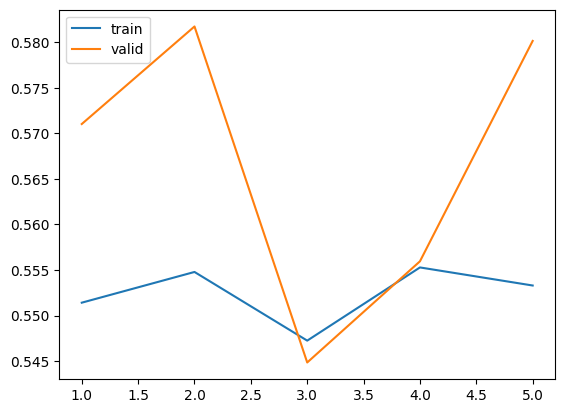

In [ ]:
plot_train_metrics(history_2)

In [ ]:
y_hat_prob2 = model_2.predict(X_test)
y_hat_prob2[:3]

W0000 00:00:1729770602.316632     116 assert_op.cc:38] Ignoring Assert operator functional_3_1/bert_layer_1_1/tf_bert_model_1/bert/embeddings/assert_less/Assert/Assert


98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step

W0000 00:00:1729770628.984339     117 assert_op.cc:38] Ignoring Assert operator functional_3_1/bert_layer_1_1/tf_bert_model_1/bert/embeddings/assert_less/Assert/Assert


99/99 ━━━━━━━━━━━━━━━━━━━━ 35s 272ms/step


array([[0.6563093 , 0.25063342, 0.09305723],
       [0.4847824 , 0.31115553, 0.20406203],
       [0.2836743 , 0.37190032, 0.3444254 ]], dtype=float32)

In [ ]:
y_hat2 = np.argmax(y_hat_prob2, axis=1)

In [ ]:
# Calcular la exactitud (accuracy)
scores = model_2.evaluate(X_test, y_test)
scores[1]

W0000 00:00:1729770663.387998     117 assert_op.cc:38] Ignoring Assert operator functional_3_1/bert_layer_1_1/tf_bert_model_1/bert/embeddings/assert_less/Assert/Assert


98/99 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.5902 - f1_score: 0.5550 - loss: 0.8795

W0000 00:00:1729770687.054063     115 assert_op.cc:38] Ignoring Assert operator functional_3_1/bert_layer_1_1/tf_bert_model_1/bert/embeddings/assert_less/Assert/Assert


99/99 ━━━━━━━━━━━━━━━━━━━━ 32s 239ms/step - accuracy: 0.5903 - f1_score: 0.5550 - loss: 0.8797


0.5933333039283752

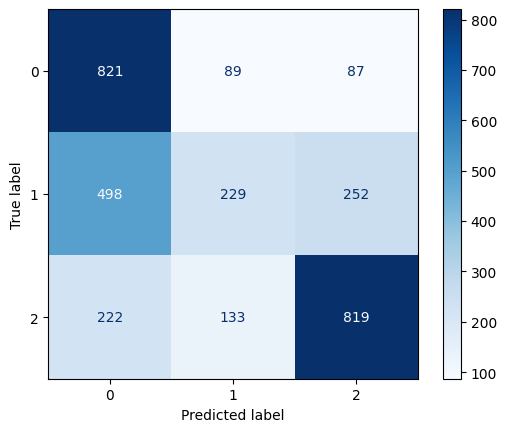

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat2)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(3)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se evidencia que persiste la dificultad de predecir las intancias neutras

In [ ]:
model_2.save_weights('bert_weights_2.weights.h5')

In [ ]:
text = "I hate this product, it is terrible!"

# Tokenize the text
tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length,
    return_token_type_ids=False,
    return_attention_mask=True,
    padding='max_length',
    truncation=True,
    return_tensors='tf'
)

X_test = [
    tf_batch['input_ids'],
    tf_batch['attention_mask']
]

y_prob_test = model_2.predict(X_test)
y_prob = np.argmax(y_prob_test, axis=1)
print("Clasificación:", class_names[int(y_prob)])

W0000 00:00:1729771198.431805     118 assert_op.cc:38] Ignoring Assert operator functional_3_1/bert_layer_1_1/tf_bert_model_1/bert/embeddings/assert_less/Assert/Assert


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Clasificación: negative


/tmp/ipykernel_30/1478796146.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Clasificación:", class_names[int(y_prob)])


# Conclusiones

El ejercicio pone de manifiesto la importancia de la selección adecuada de parámetros y de la posibilidad de personalizar los modelos para ajustarlos a las características de los datos que se evaluen. Así mismo considerar el trade off entre accuracy y disponibilidad de potencia de computo.

Los parámetros ajustados fueron:

max_legth

personalización del modelo, agregando una capa densa.